In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\computer\Downloads\Medications_image.csv")

In [2]:
df2 = df.Brand.str.contains('Seretide')

In [3]:
df[df2].to_csv(r"C:\Users\computer\Downloads\Seretide.csv")

In [4]:
df = pd.read_csv(r"C:\Users\computer\Downloads\Seretide.csv")

In [5]:
import re
import unicodedata
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

ADDITIONAL_STOPWORDS = ['using','ventilin','around','long','familiar','inc','dos','ccg','ic','1st','line','le','due','mdi']

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\computer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
def basic_clean(image):
  
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  image = (unicodedata.normalize('NFKD', image)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', image).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [7]:
words = basic_clean(''.join(str(df['Description'].tolist())))

In [8]:
words[:20]

['time',
 'people',
 'used',
 'expensive',
 'increase',
 'pneumonia',
 'increase',
 'pneumonia',
 'expensive',
 'cost',
 'formulary',
 'twice',
 'daily',
 'costly',
 'increase',
 'risk',
 'pneumomia',
 'cost',
 'risk',
 'pneumonia']

In [9]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

(cost, cost)           8
(well, known)          7
(well, established)    7
(different, device)    6
(local, guideline)     5
(device, cost)         5
(tried, tested)        4
(cost, formulary)      4
(patient, like)        4
(inhaler, device)      3
(use, patient)         3
(easy, use)            3
(accuhaler, device)    3
(increased, risk)      3
(local, formulary)     3
(well, tried)          3
(expensive, old)       3
(side, effect)         3
(first, choice)        3
(familiarity, cost)    3
dtype: int64

In [10]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

(different, device, cost)              3
(well, established, brand)             3
(expensive, old, fashioned)            2
(cost, well, established)              2
(local, guideline, expensive)          2
(increased, risk, bronchopneumonia)    2
(cost, local, guidance)                2
(ic, _, laba)                          2
(patient, like, device)                2
(laba, slow, acting)                   2
(available, suitable, patient)         1
(increase, quality, life)              1
(device, like, step)                   1
(expensive, approved, dry)             1
(relvar, gsk, branded)                 1
(yesterday, rx, pneumonia)             1
(cheaper, generic, patient)            1
(option, inhalor, device)              1
(like, device, trust)                  1
(well, known, effective)               1
dtype: int64

In [11]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

<AxesSubplot:>

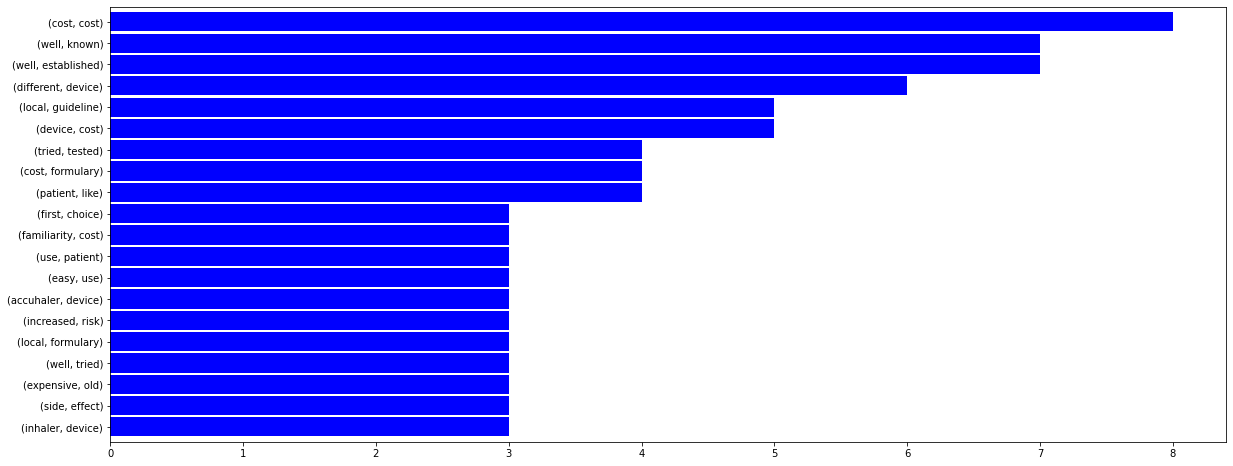

In [12]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(20, 8))

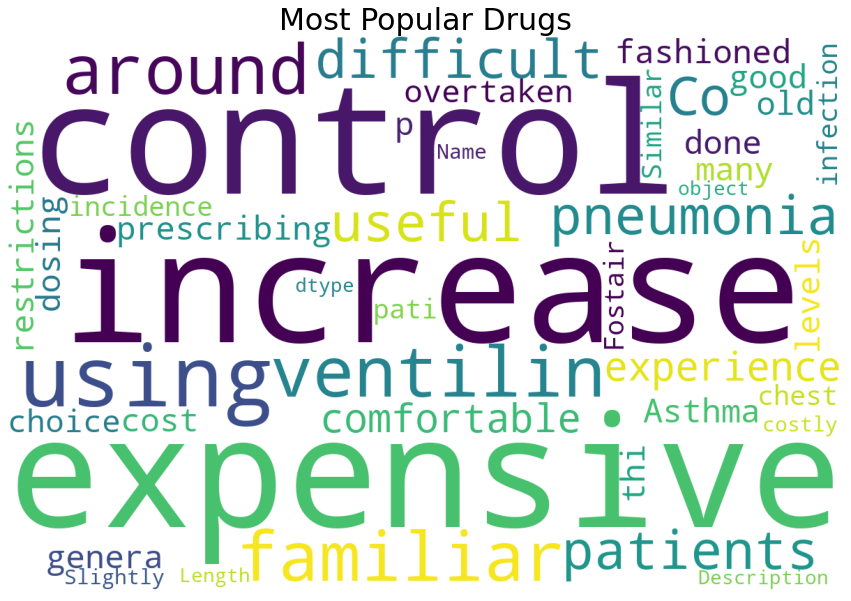

In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(str(df['Description']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [14]:
from textblob import TextBlob
df['polarity'] = df["Description"].astype(str).apply(lambda x: TextBlob(x).polarity)
df['subjective'] = df["Description"].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [15]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['using','ventilin','around','long','familiar','inc','dos','ccg','ic','1st','line','le','due','mdi']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df["Description"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [17]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)
df_ngram.to_csv(r'C:\Users\computer\Downloads\Seretide-BigramSentiment.csv')
print(df_ngram.head(20))

    frequency          bigram/trigram  polarity  subjective
0           8               cost cost      0.00    0.000000
1           7              well known      0.00    0.000000
2           7        well established      0.00    0.000000
3           5        local guidelines      0.00    0.000000
4           5            devices cost      0.00    0.000000
5           4            tried tested      0.00    0.000000
6           4       different devices      0.00    0.600000
7           4          cost formulary      0.00    0.000000
8           3              well tried      0.00    0.000000
9           3  well established brand      0.00    0.000000
10          3             use patient      0.00    0.000000
11          3           patients like      0.00    0.000000
12          3          local guidance      0.00    0.000000
13          3         local formulary      0.00    0.000000
14          3          increased risk      0.00    0.000000
15          3           gold standard   

In [18]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\computer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
import numpy as np

df = pd.read_csv(r"C:\Users\computer\Downloads\Seretide.csv")
df.head()

,Unnamed: 0,Respondent_Serial,Brand,Description
0,1,10,Seretide,Those using ventilin and this has been around...
1,5,11,Seretide,"familiar , expensive , increase in pneumonia ..."
2,9,14,Seretide,""" useful for difficult control patients . Co..."
3,11,15,Seretide,"More experience , comfortable prescribing thi..."
4,18,18,Seretide,"i have just done this . "" the genera..."


In [20]:
df['scores'] = df['Description'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
df.head()

,Unnamed: 0,Respondent_Serial,Brand,Description,scores,compound,comp_score
0,1,10,Seretide,Those using ventilin and this has been around...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,5,11,Seretide,"familiar , expensive , increase in pneumonia ...","{'neg': 0.167, 'neu': 0.627, 'pos': 0.206, 'co...",0.3182,pos
2,9,14,Seretide,""" useful for difficult control patients . Co...","{'neg': 0.129, 'neu': 0.722, 'pos': 0.149, 'co...",0.1027,pos
3,11,15,Seretide,"More experience , comfortable prescribing thi...","{'neg': 0.0, 'neu': 0.607, 'pos': 0.393, 'comp...",0.7564,pos
4,18,18,Seretide,"i have just done this . "" the genera...","{'neg': 0.043, 'neu': 0.866, 'pos': 0.091, 'co...",0.3160,pos


In [21]:
df.to_csv(r'C:\Users\computer\Downloads\SeretideSentiment.csv')

In [22]:
import re
import spacy

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# import vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# import numpy for matrix operation
import numpy as np

# import LDA from sklearn
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
nlp = spacy.load('en_core_web_sm')

In [24]:
df = pd.read_csv(r"C:\Users\computer\Downloads\Seretide.csv")

In [25]:
stoplist = stopwords.words('english') + ['using','ventilin','around','long','familiar','inc','dos','ccg','ic','1st','line','le','due','mdi']
stop = set(stoplist)

# punctuation 
exclude = set(string.punctuation) 

# lemmatization
lemma = WordNetLemmatizer() 

# One function for all the steps:
def clean(doc):
    
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
    
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())  
    return normalized

# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in df['Description']]  

In [26]:
# Converting text into numerical representation
tf_idf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)

# Converting text into numerical representation
cv_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
# Array from TF-IDF Vectorizer 
tf_idf_arr = tf_idf_vectorizer.fit_transform(clean_corpus)

# Array from Count Vectorizer 
cv_arr = cv_vectorizer.fit_transform(clean_corpus)
vocab_tf_idf = tf_idf_vectorizer.get_feature_names()
vocab_cv = cv_vectorizer.get_feature_names()

In [27]:
lda_model = LatentDirichletAllocation(n_components = 6, max_iter = 20, random_state = 20)

# fit transform on model on our count_vectorizer : running this will return our topics 
X_topics = lda_model.fit_transform(tf_idf_arr)

# .components_ gives us our topic distribution 
topic_words = lda_model.components_

In [28]:
n_top_words = 5

for i, topic_dist in enumerate(topic_words):
    
    # np.argsort to sorting an array or a list or the matrix acc to their values
    sorted_topic_dist = np.argsort(topic_dist)
    
    # Next, to view the actual words present in those indexes we can make the use of the vocab created earlier
    topic_words = np.array(vocab_tf_idf)[sorted_topic_dist]
    
    # so using the sorted_topic_indexes we ar extracting the words from the vocabulary
    # obtaining topics + words
    # this topic_words variable contains the Topics  as well as the respective words present in those Topics
    topic_words = topic_words[:-n_top_words:-1]
    print ("Topic", str(i+1), topic_words)

Topic 1 ['device' 'effective' 'well' 'guideline']
Topic 2 ['cost' 'patient' 'device' 'different']
Topic 3 ['expensive' 'use' 'fashioned' 'first']
Topic 4 ['option' 'patient' 'used' 'guideline']
Topic 5 ['cost' 'formulary' 'tried' 'tested']
Topic 6 ['cost' 'expensive' 'pneumonia' 'lot']
